In [33]:
Sys.setlocale(category = 'LC_ALL' , locale = 'ko_KR.UTF-8') ## 한글보이기

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

In [34]:
no <- 1:4
name <- c("Apple", "Banana", "Peach", "Bearry")
price <- c(500,200,200,50)
qty <- c(5,4,3,2)

In [35]:
fruit <- data.frame(번호=no, 제품=name, 금액=price, 수량=qty)
fruit

번호,제품,금액,수량
<int>,<chr>,<dbl>,<dbl>
1,Apple,500,5
2,Banana,200,4
3,Peach,200,3
4,Bearry,50,2


In [36]:
# 현재 메모리에 있는 변수 보기
ls()

[1] "fruit"          "i"              "name"           "no"            
[5] "price"          "qty"            "regionAcc.mean" "seoul"

In [37]:
# 메모리 형태로 파일 보관
save(no, fruit, name, file ="../Data/testFruit.txt")

In [38]:
rm(no, fruit, name) #메모리 지우기

In [39]:
## fruit #지워서 데이터 안나옴

ERROR: Error in eval(expr, envir, enclos): 객체 'fruit'를 찾을 수 없습니다


In [13]:
load("../Data/testFruit.txt") #데이터 다시 저장

In [12]:
fruit

번호,제품,금액,수량
<int>,<chr>,<dbl>,<dbl>
1,Apple,500,5
2,Banana,200,4
3,Peach,200,3
4,Bearry,50,2


In [18]:
print(fruit)

  번호   제품 금액 수량
1    1  Apple  500    5
2    2 Banana  200    4
3    3  Peach  200    3
4    4 Bearry   50    2


In [23]:
# fruit를 csv로 저장하기
write.csv(fruit, "../Data/fruit.csv", row.names=F)   
#row.names=F은 names를 false로 불러오지 않게 함

In [24]:
read.csv("../Data/fruit.csv")

번호,제품,금액,수량
<int>,<chr>,<int>,<int>
1,Apple,500,5
2,Banana,200,4
3,Peach,200,3
4,Bearry,50,2


세계 GDP순위 데이터 정제 및 차트 만들기

In [78]:
# 데이터 불러오기
GDP_ranking <- read.csv("../Data/GDP.csv")
GDP_ranking

X,Gross.domestic.product.2018,X.1,X.2,X.3,X.4
<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>
,,NA,,,
,,NA,,(millions of,
,Ranking,NA,Economy,US dollars),
,,NA,,,
USA,1,NA,United States,"20,494,100",
CHN,2,NA,China,"13,608,152",
JPN,3,NA,Japan,"4,970,916",
DEU,4,NA,Germany,"3,996,759",
GBR,5,NA,United Kingdom,"2,825,208",


In [109]:
GDP_ranking2 <- GDP_ranking[-c(1:4),c(1,2,4,5)]
head(GDP_ranking2)

,X,Gross.domestic.product.2018,X.2,X.3
,<chr>,<chr>,<chr>,<chr>
5,USA,1,United States,"20,494,100"
6,CHN,2,China,"13,608,152"
7,JPN,3,Japan,"4,970,916"
8,DEU,4,Germany,"3,996,759"
9,GBR,5,United Kingdom,"2,825,208"
10,FRA,6,France,"2,777,535"


In [110]:
#사위 15개국만 선별한다.
GDP_ranking15 <- head(GDP_ranking2,15)
GDP_ranking15

,X,Gross.domestic.product.2018,X.2,X.3
,<chr>,<chr>,<chr>,<chr>
5,USA,1,United States,"20,494,100"
6,CHN,2,China,"13,608,152"
7,JPN,3,Japan,"4,970,916"
8,DEU,4,Germany,"3,996,759"
9,GBR,5,United Kingdom,"2,825,208"
10,FRA,6,France,"2,777,535"
11,IND,7,India,"2,726,323"
12,ITA,8,Italy,"2,073,902"
13,BRA,9,Brazil,"1,868,626"


In [111]:
#컬럼 이름 변경
colnames(GDP_ranking15) <-c("Code", "Ranking", "Nation", "GDP")
GDP_ranking15

,Code,Ranking,Nation,GDP
,<chr>,<chr>,<chr>,<chr>
5,USA,1,United States,"20,494,100"
6,CHN,2,China,"13,608,152"
7,JPN,3,Japan,"4,970,916"
8,DEU,4,Germany,"3,996,759"
9,GBR,5,United Kingdom,"2,825,208"
10,FRA,6,France,"2,777,535"
11,IND,7,India,"2,726,323"
12,ITA,8,Italy,"2,073,902"
13,BRA,9,Brazil,"1,868,626"


In [113]:
#rownames 새로 구하기
rownames(GDP_ranking15) <- c()
print(GDP_ranking15)

   Code Ranking             Nation          GDP
1   USA       1      United States  20,494,100 
2   CHN       2              China  13,608,152 
3   JPN       3              Japan   4,970,916 
4   DEU       4            Germany   3,996,759 
5   GBR       5     United Kingdom   2,825,208 
6   FRA       6             France   2,777,535 
7   IND       7              India   2,726,323 
8   ITA       8              Italy   2,073,902 
9   BRA       9             Brazil   1,868,626 
10  CAN      10             Canada   1,712,510 
11  RUS      11 Russian Federation   1,657,554 
12  KOR      12        Korea, Rep.   1,619,424 
13  AUS      13          Australia   1,432,195 
14  ESP      14              Spain   1,426,189 
15  MEX      15             Mexico   1,223,809 


In [114]:
library(stringr)  #패키지불러오기

In [152]:
#GDP 컬럼을 숫자로 변환하기! (숫자로 변환해야 차트생성!)

# GDP_ranking15$GDP <- str_replace_all(GDP_ranking15$GDP, ",", "")
# as.numeric(GDP_ranking15)

GDP_ranking15$GDP <- as.numeric(str_remove_all(GDP_ranking15$GDP, ","))
GDP_ranking15


Code,Ranking,Nation,GDP
<chr>,<chr>,<chr>,<dbl>
USA,1,United States,20494100
CHN,2,China,13608152
JPN,3,Japan,4970916
DEU,4,Germany,3996759
GBR,5,United Kingdom,2825208
FRA,6,France,2777535
IND,7,India,2726323
ITA,8,Italy,2073902
BRA,9,Brazil,1868626


In [153]:
#지수 없애기
options(scipen = 100)
options(repr.plot.width = 15, repr.plot.height = 9)
# Sys.setlocale(category = 'LC_All' , locale = 'ko_KR.UTF-8')
Sys.setlocale(category = 'LC_ALL' , locale = 'ko_KR.UTF-8') ## 한글보이기

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

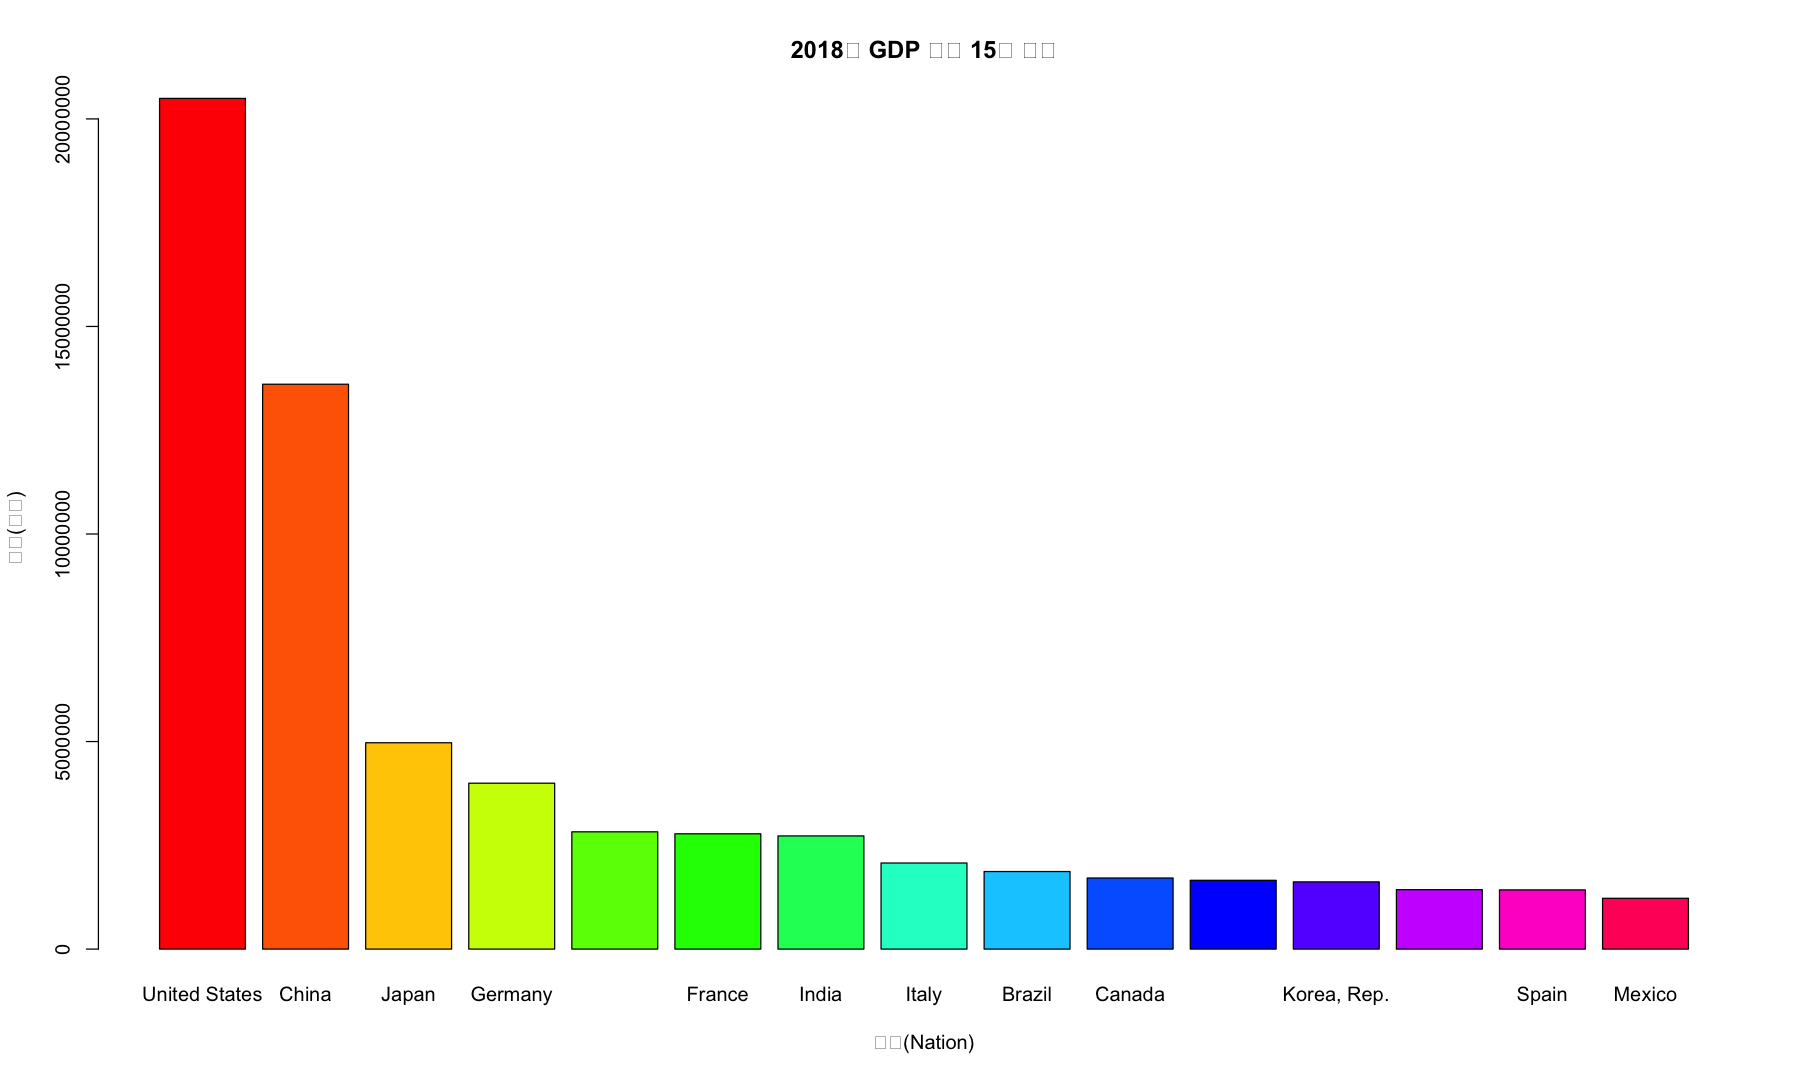

In [133]:
#막대 그래프 시각화
par(bg = 'white') # 배경 흰색
barplot(
    GDP_ranking15$GDP,# $GDP 상위 15개국 data
    col = rainbow(nrow(GDP_ranking15)),
    # col= c("blue","green", "yellow","blue","green", "yellow","blue","green", "yellow")
    xlab = "국가(Nation)", #x축이름
    ylab = "단위(달러)", #y축이름
    main = "2018년 GDP 세계 15위 국가", #title
    names = GDP_ranking15$Nation,
    # cex.names = GDP_ranking15$Code  #크기
)

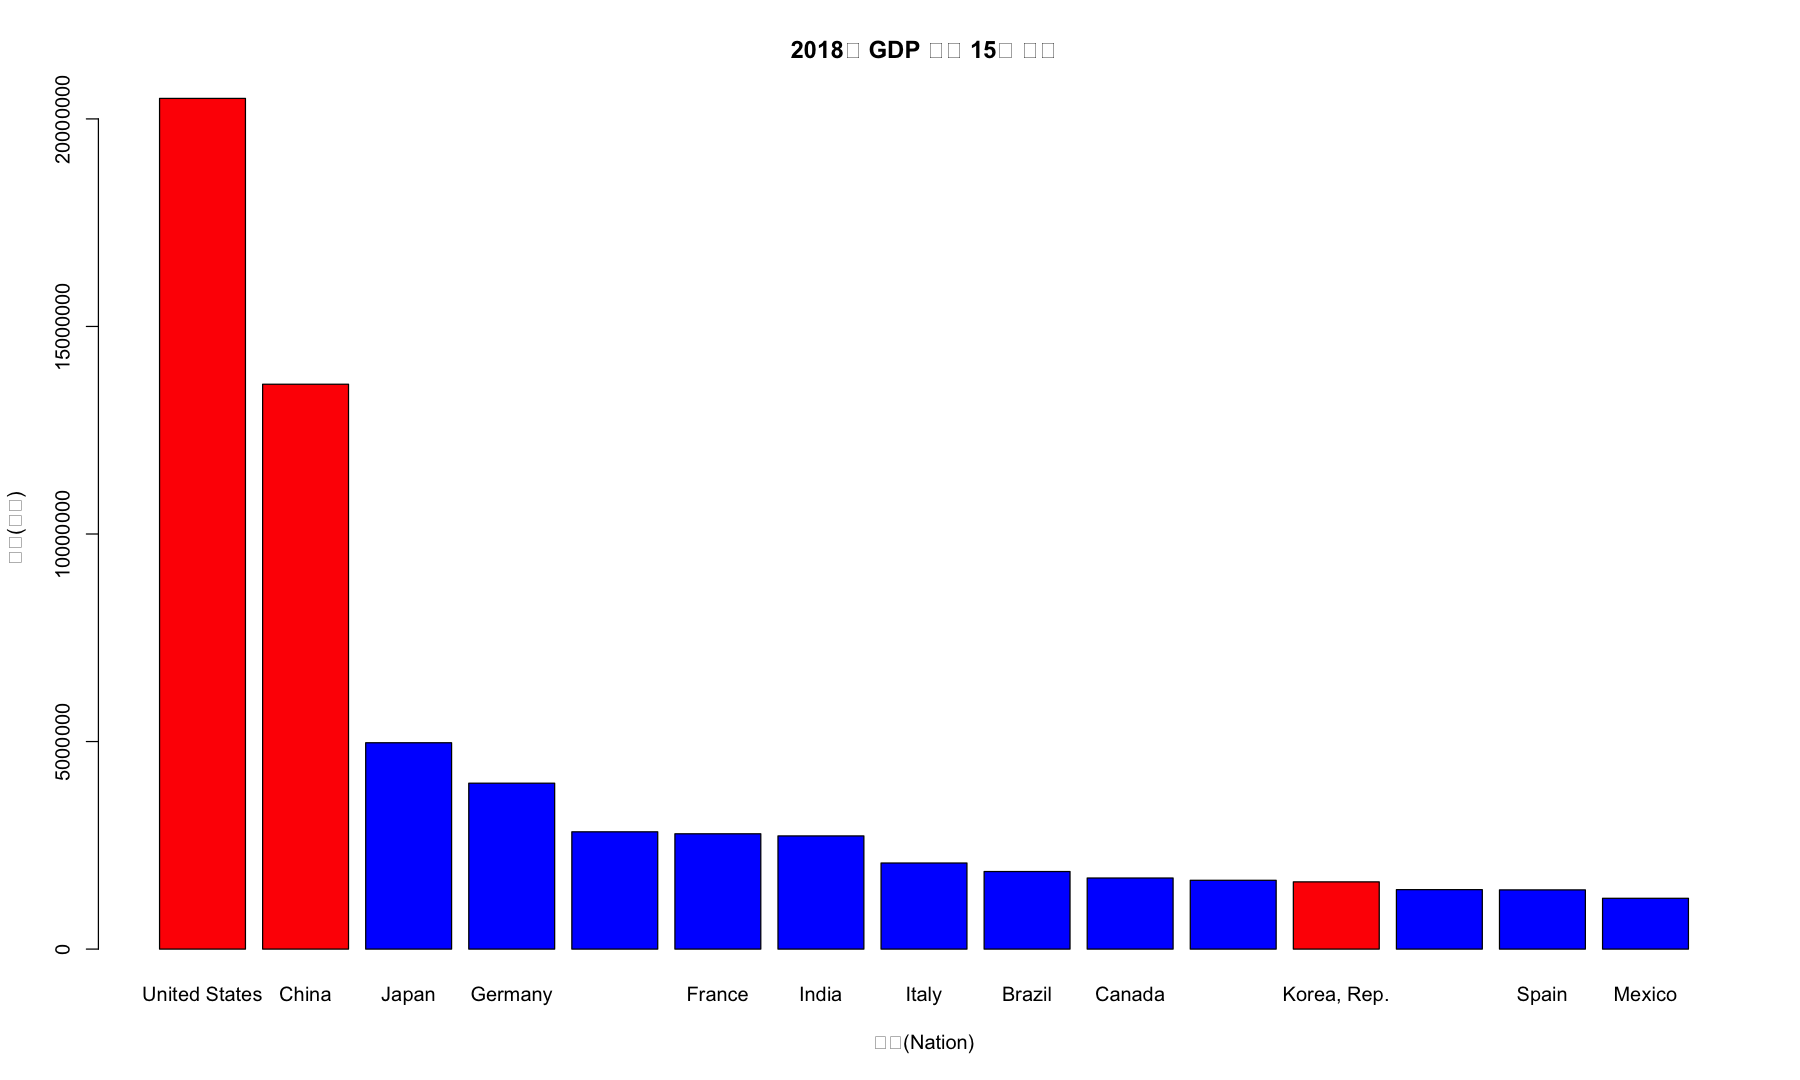

In [145]:
# 미국과 중국 한국만 빨간색으로 나머지는 파란색으로 표현하기

par(bg = 'white')
barplot(
    GDP_ranking15$GDP,
    col = ifelse(GDP_ranking15$Code == c("USA", "CHN", "KOR"), "red", "blue"),
    xlab = "국가(Nation)", 
    ylab = "단위(달러)", 
    main = "2018년 GDP 세계 15위 국가",
    names = GDP_ranking15$Nation,
    # cex.names = GDP_ranking15$Code  #크기
)


In [161]:
c("USA", "CHN", "KOR")

ifelse(GDP_ranking15$Code == c("USA", "CHN", "KOR"),1,0)

ifelse(GDP_ranking15$Code == c( "CHN", "USA", "KOR"),1,0)


ifelse(GDP_ranking15$Code == c("USA"),1,0)+
ifelse(GDP_ranking15$Code == c("CHN"),1,0)+
ifelse(GDP_ranking15$Code == c("KOR"),1,0)

ifelse(
ifelse(GDP_ranking15$Code == c("USA"),1,0)+
ifelse(GDP_ranking15$Code == c("CHN"),1,0)+
ifelse(GDP_ranking15$Code == c("KOR"),1,0) == 1, "red", "blue")





par(bg = 'white')
barplot(
    GDP_ranking15$GDP,
    col = colorDefine(),    #### <----여기에 함수로 넣기!
    xlab = "국가(Nation)", 
    ylab = "단위(달러)", 
    main = "2018년 GDP 세계 15위 국가",
    names = GDP_ranking15$Nation,
    # cex.names = GDP_ranking15$Code  #크기
)


colorDefine() <- function(){
return(
    ifelse(
      ifelse(GDP_ranking15$Code == c("USA"),1,0)+
      ifelse(GDP_ranking15$Code == c("CHN"),1,0)+
      ifelse(GDP_ranking15$Code == c("KOR"),1,0) == 1, "red", "blue"))
}



[1] "USA" "CHN" "KOR"

[1] 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0

[1] 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0

[1] 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0

[1] "red"  "red"  "blue" "blue" "blue" "blue" "blue" "blue" "blue" "blue"
[11] "blue" "red"  "blue" "blue" "blue"

ERROR: Error in colorDefine(): 함수 "colorDefine"를 찾을 수 없습니다


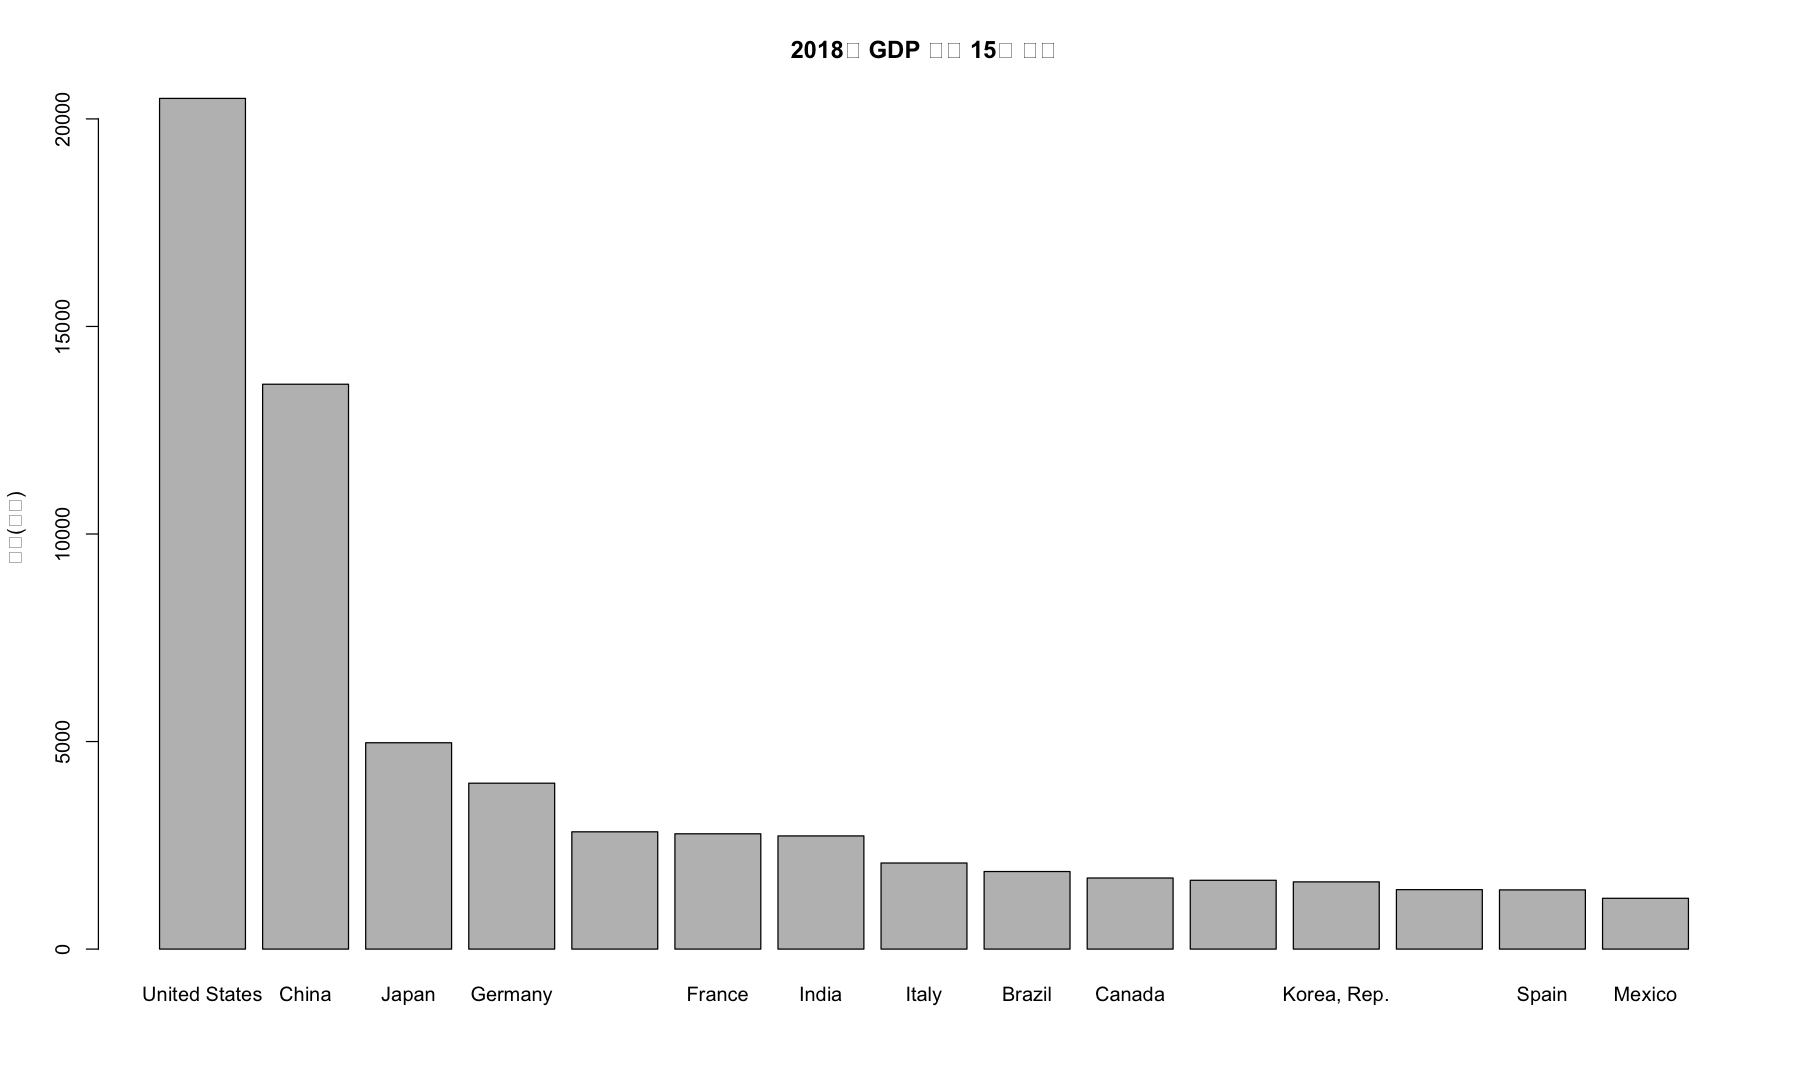

In [159]:
# 단위를 천단위로 표시하기

par(bg = 'white')
# par(family = "AppleGothic")
barplot(
    GDP_ranking15$GDP/1000, # 단위를 천단위로 표시하기
    # col = colorDefine(),    
    ylab = "단위(달러)", 
    main = "2018년 GDP 세계 15위 국가",
    names = GDP_ranking15$Nation,)
    # cex.names = GDP_ranking15$Code  #크기

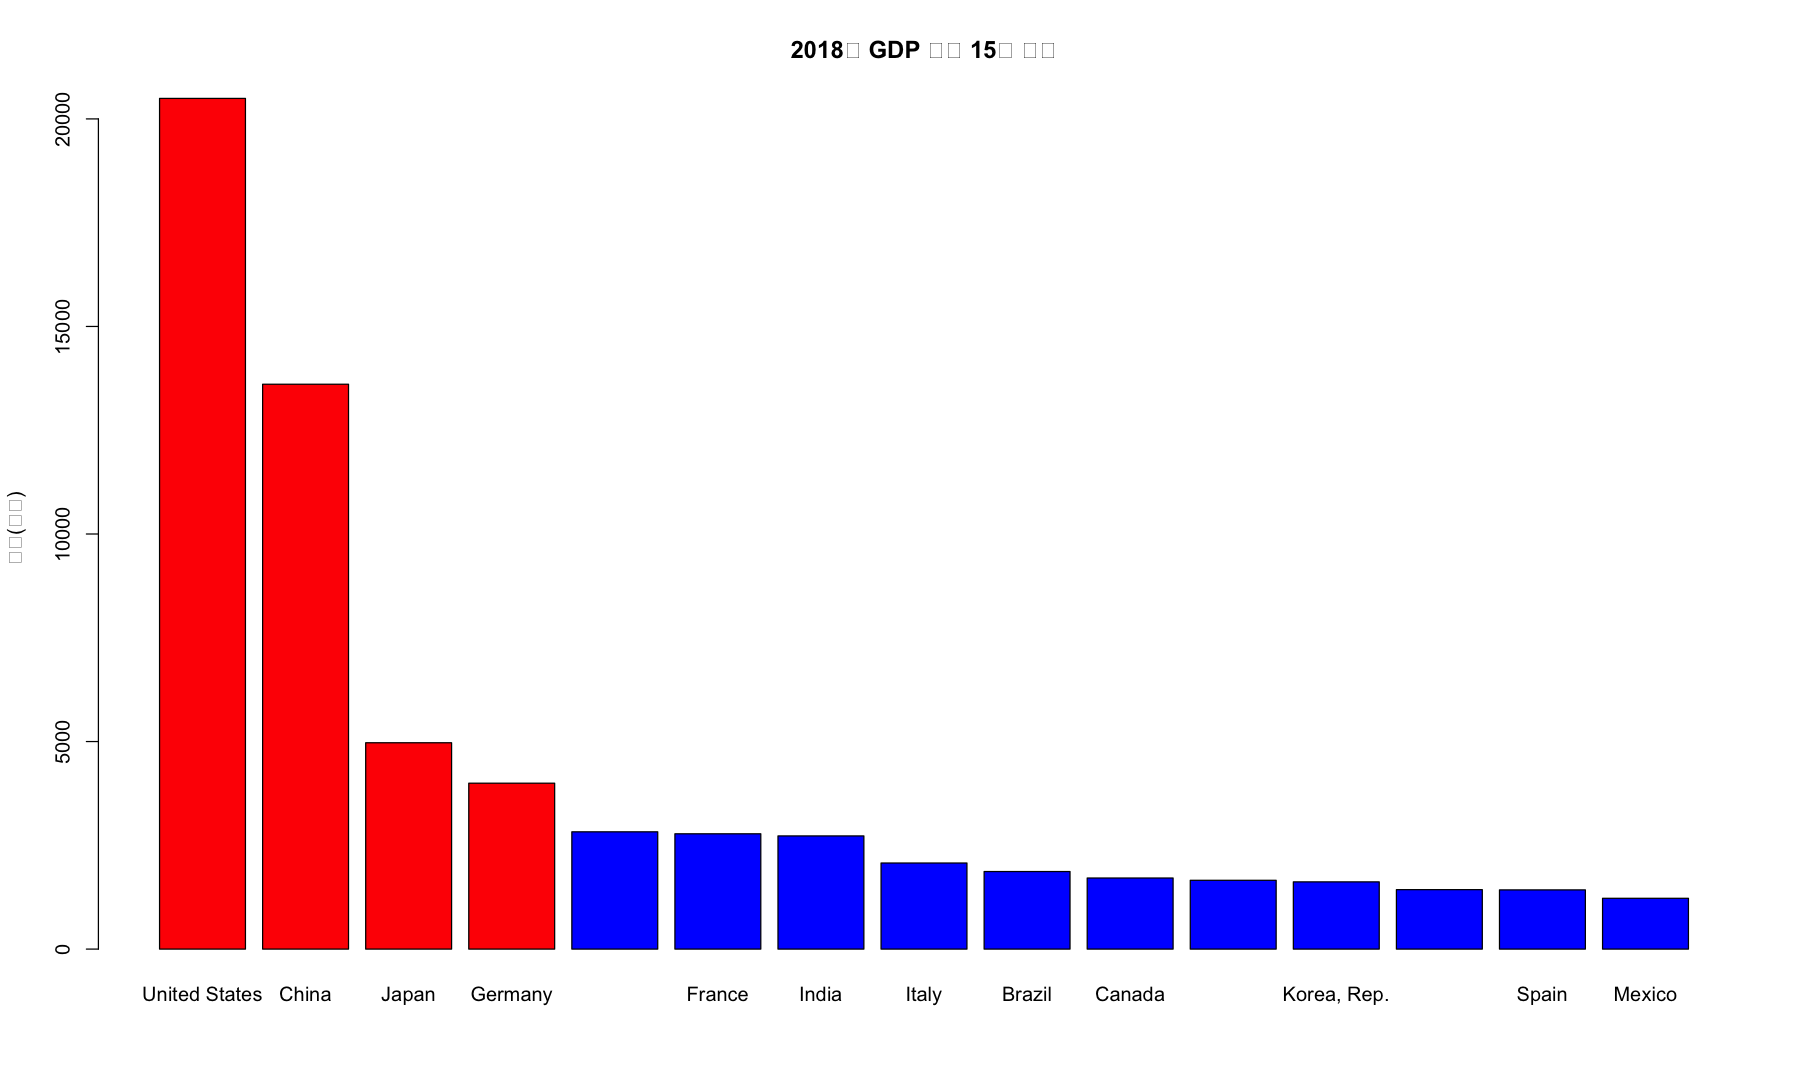

In [165]:
#GDP가 3000이상인 국가만 빨간색으로
par(bg = 'white')
# par(family = "AppleGothic")
barplot(
    GDP_ranking15$GDP/1000, # 단위를 천단위로 표시하기
    col = ifelse(GDP_ranking15$GDP/1000 >= 3000, "red", "blue"),
    ylab = "단위(달러)", 
    main = "2018년 GDP 세계 15위 국가",
    names = GDP_ranking15$Nation,)
    ylim = c(0,25000)




데이터 처리

In [168]:
install.packages("dplyr")

‘pkgconfig’, ‘generics’, ‘tibble’, ‘tidyselect’(들)을 또한 설치합니다.





다운로드된 바이너리 패키지들은 다음의 위치에 있습니다
	/var/folders/1z/wqwl5n1552l1vkv_646ktfm00000gn/T//RtmpYlka9U/downloaded_packages


In [64]:
#데이터 정렬
library(dplyr)


다음의 패키지를 부착합니다: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [170]:
head(arrange(iris, Sepal.Length))

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,4.3,3.0,1.1,0.1,setosa
2,4.4,2.9,1.4,0.2,setosa
3,4.4,3.0,1.3,0.2,setosa
4,4.4,3.2,1.3,0.2,setosa
5,4.5,2.3,1.3,0.3,setosa
6,4.6,3.1,1.5,0.2,setosa


In [175]:
head(arrange(iris[,1:2], Sepal.Width))  # Petal.Width) #이건 에러!!

,Sepal.Length,Sepal.Width
,<dbl>,<dbl>
1,5.0,2.0
2,6.0,2.2
3,6.2,2.2
4,6.0,2.2
5,4.5,2.3
6,5.5,2.3


In [174]:
head(arrange(iris, Sepal.Length, Petal.Length))

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,4.3,3.0,1.1,0.1,setosa
2,4.4,3.0,1.3,0.2,setosa
3,4.4,3.2,1.3,0.2,setosa
4,4.4,2.9,1.4,0.2,setosa
5,4.5,2.3,1.3,0.3,setosa
6,4.6,3.6,1.0,0.2,setosa


In [178]:
#내림차순
head(arrange(iris, desc(Sepal.Length)))

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,7.9,3.8,6.4,2.0,virginica
2,7.7,3.8,6.7,2.2,virginica
3,7.7,2.6,6.9,2.3,virginica
4,7.7,2.8,6.7,2.0,virginica
5,7.7,3.0,6.1,2.3,virginica
6,7.6,3.0,6.6,2.1,virginica


Sampling

In [213]:
set.seed(42)  #번호 맞춰줌 고정
sample(1:100, 10)
nrow(iris)  #iris데이터 개수

[1]  49  65  25  74  18 100  47  24  71  89

[1] 150

In [237]:
set.seed(42) 
samp <- sample(1:nrow(iris), nrow(iris)*0.7)
samp


[1]  49  65  74 146 122 150 128  47  24  71 100  89 110  20 114 111 131  41
 [19] 139  27 109   5  84  34  92 104   3  58  97  42 142  30  43  15  22 123
 [37]   8  36  68  86  18 130 126  69   4  98  50  99  88  87 145  26   6 105
 [55]   2 124  21  96 115  10  40 129  33 140  73  29  76   9  35  16 107  93
 [73] 120 138  80  55  90  94  57 121  77  13  53  54  32  60  85  17  44  83
 [91]  72 135 118 149  48 136  64  38   1 144  14 132  61  81 103

In [215]:
irisSamp <- iris[samp,]
head(irisSamp)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
49,5.3,3.7,1.5,0.2,setosa
65,5.6,2.9,3.6,1.3,versicolor
74,6.1,2.8,4.7,1.2,versicolor
146,6.7,3.0,5.2,2.3,virginica
122,5.6,2.8,4.9,2.0,virginica
150,5.9,3.0,5.1,1.8,virginica


In [223]:
# Sampling 검증
table(irisSamp$Species)


    setosa versicolor  virginica 
        38         35         32 

In [241]:
set.seed(42) 
sample(1:50, 35)
sample(51:100, 35)
sample(101:150, 35)

samp <- c(sample(1:50, 35), sample(51:100, 35), sample(101:150, 35))


[1] 49 37  1 25 10 36 18 24  7 45 47 50 20 26  3 40 27 31 13  5 38  2 28  8 41
[26] 48 46 11 15 34  4 30 44 32 12

[1]  55  54  84  85  74  73  76  56  93  52  53  71  91  60 100  83  59  79  62
[20]  70  98  61  90  66  86  96  64  94  72  88  68  67  81  95  75

[1] 140 150 121 136 147 139 142 118 127 113 119 132 116 129 117 109 148 108 137
[20] 123 106 101 141 114 105 135 131 138 111 110 134 145 146 144 143

In [242]:
irisSamp <- iris[samp,]
head(irisSamp)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
47,5.1,3.8,1.6,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
50,5.0,3.3,1.4,0.2,setosa
43,4.4,3.2,1.3,0.2,setosa
37,5.5,3.5,1.3,0.2,setosa
16,5.7,4.4,1.5,0.4,setosa


In [243]:
# Sampling 검증
table(irisSamp$Species)


    setosa versicolor  virginica 
        35         35         35 

In [244]:
iris.train <-iris[samp,]
head(iris.train)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
47,5.1,3.8,1.6,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
50,5.0,3.3,1.4,0.2,setosa
43,4.4,3.2,1.3,0.2,setosa
37,5.5,3.5,1.3,0.2,setosa
16,5.7,4.4,1.5,0.4,setosa


In [245]:
iris.test <-iris[-samp,]  #샘플링 후 나머지 데이터
head(iris.train)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
47,5.1,3.8,1.6,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
50,5.0,3.3,1.4,0.2,setosa
43,4.4,3.2,1.3,0.2,setosa
37,5.5,3.5,1.3,0.2,setosa
16,5.7,4.4,1.5,0.4,setosa


In [246]:
#데이터 크기 검증
table(iris.test$Species)


    setosa versicolor  virginica 
        15         15         15 

In [247]:
# 데이터 검증
summary(iris.train)
summary(iris.test)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.400   Median :1.300  
 Mean   :5.861   Mean   :3.084   Mean   :3.738   Mean   :1.207  
 3rd Qu.:6.500   3rd Qu.:3.400   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.700   Max.   :4.400   Max.   :6.700   Max.   :2.500  
       Species  
 setosa    :35  
 versicolor:35  
 virginica :35  
                
                
                

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.400   Min.   :2.200   Min.   :1.200   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.700   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.700   Median :3.000   Median :4.100   Median :1.300  
 Mean   :5.802   Mean   :2.996   Mean   :3.804   Mean   :1.182  
 3rd Qu.:6.300   3rd Qu.:3.200   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :3.900   Max.   :6.900   Max.   :2.300  
       Species  
 setosa    :15  
 versicolor:15  
 virginica :15  
                
                
                

모집단에서 필요한 데이터만 추출하기

In [4]:
# iris에서 Species가 setosa인것만 추출하여 iris_setosa라는 데이터 프레임 만들기
subset(iris, Species == "setosa")

iris_setosa <- subset(iris, Species == "setosa")
nrow(iris_setosa) #데이터 개수


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


[1] 50

In [5]:
head(iris_setosa)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [6]:
str(iris_setosa)

'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [7]:
#fatcor 조정하기
iris_setosa$Species <- factor(iris_setosa$Species)
str(iris_setosa)

'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 1 level "setosa": 1 1 1 1 1 1 1 1 1 1 ...


In [14]:
#iris에서 Species가 versicolor인것만 추출하여 iris_versicolor라는 데이터프레임 만들기
subset(iris, Species == "versicolor")

iris_versicolor <- subset(iris, Species == "versicolor")
nrow(iris_versicolor)

head(iris_versicolor)

rownames(iris_versicolor) <- c()  # 0부터 나오게 번호 초기화
print(head(iris_versicolor))

str(iris_versicolor)

iris_versicolor$Species <- factor(iris_versicolor$Species) 
str(iris_versicolor)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
51,7.0,3.2,4.7,1.4,versicolor
52,6.4,3.2,4.5,1.5,versicolor
53,6.9,3.1,4.9,1.5,versicolor
54,5.5,2.3,4.0,1.3,versicolor
55,6.5,2.8,4.6,1.5,versicolor
56,5.7,2.8,4.5,1.3,versicolor
57,6.3,3.3,4.7,1.6,versicolor
58,4.9,2.4,3.3,1.0,versicolor
59,6.6,2.9,4.6,1.3,versicolor


[1] 50

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
51,7.0,3.2,4.7,1.4,versicolor
52,6.4,3.2,4.5,1.5,versicolor
53,6.9,3.1,4.9,1.5,versicolor
54,5.5,2.3,4.0,1.3,versicolor
55,6.5,2.8,4.6,1.5,versicolor
56,5.7,2.8,4.5,1.3,versicolor


  Sepal.Length Sepal.Width Petal.Length Petal.Width    Species
1          7.0         3.2          4.7         1.4 versicolor
2          6.4         3.2          4.5         1.5 versicolor
3          6.9         3.1          4.9         1.5 versicolor
4          5.5         2.3          4.0         1.3 versicolor
5          6.5         2.8          4.6         1.5 versicolor
6          5.7         2.8          4.5         1.3 versicolor
'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  7 6.4 6.9 5.5 6.5 5.7 6.3 4.9 6.6 5.2 ...
 $ Sepal.Width : num  3.2 3.2 3.1 2.3 2.8 2.8 3.3 2.4 2.9 2.7 ...
 $ Petal.Length: num  4.7 4.5 4.9 4 4.6 4.5 4.7 3.3 4.6 3.9 ...
 $ Petal.Width : num  1.4 1.5 1.5 1.3 1.5 1.3 1.6 1 1.3 1.4 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 2 2 2 2 2 2 2 2 2 2 ...


ERROR: Error in -str(iris_versicolor): invalid argument to unary operator


In [35]:
# iris에서 Species가 setosa이고, Sepal.Length가 5보다 큰 자료만 추출하여 갯수 구하기
head(iris_setosa)
iris_a <- subset(iris, Species == "setosa")

iris_b <- subset(iris_a, Sepal.Length > 5)
head(iris_b)

rownames(iris_b) <- c()
head(iris_b)

iris_versicolor$Species <- factor(iris_versicolor$Species)
str(iris_versicolor)

nrow(iris_versicolor)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
11,5.4,3.7,1.5,0.2,setosa
15,5.8,4.0,1.2,0.2,setosa
16,5.7,4.4,1.5,0.4,setosa
17,5.4,3.9,1.3,0.4,setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,5.4,3.9,1.7,0.4,setosa
3,5.4,3.7,1.5,0.2,setosa
4,5.8,4.0,1.2,0.2,setosa
5,5.7,4.4,1.5,0.4,setosa
6,5.4,3.9,1.3,0.4,setosa


'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  7 6.4 6.9 5.5 6.5 5.7 6.3 4.9 6.6 5.2 ...
 $ Sepal.Width : num  3.2 3.2 3.1 2.3 2.8 2.8 3.3 2.4 2.9 2.7 ...
 $ Petal.Length: num  4.7 4.5 4.9 4 4.6 4.5 4.7 3.3 4.6 3.9 ...
 $ Petal.Width : num  1.4 1.5 1.5 1.3 1.5 1.3 1.6 1 1.3 1.4 ...
 $ Species     : Factor w/ 1 level "versicolor": 1 1 1 1 1 1 1 1 1 1 ...


[1] 50

In [42]:
# subset으로 컬럼 지우기
subset(iris, select = -Species)
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4
7,4.6,3.4,1.4,0.3
8,5.0,3.4,1.5,0.2
9,4.4,2.9,1.4,0.2


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [48]:
#iris에서 품종별로 Sepal.Width의 평균 구하기
mean(subset(iris, Species == "setosa")$Sepal.Width)
mean(subset(iris, Species == "versicolor")$Sepal.Width)
mean(subset(iris, Species == "virginica")$Sepal.Width)


[1] 3.428

[1] 2.77

[1] 2.974

In [47]:
for(specie in unique(iris$Species)){
    print(mean(subset(iris, Species == specie)$Sepal.Width))
}

[1] 3.428
[1] 2.77
[1] 2.974


그룹연산 함수

In [45]:
aggregate(Sepal.Width ~ Species, iris, mean)  #종별 평균
aggregate(Sepal.Width ~ Species, iris, sum) #종별 합계 

Species,Sepal.Width
<fct>,<dbl>
setosa,3.428
versicolor,2.770
virginica,2.974


Species,Sepal.Width
<fct>,<dbl>
setosa,171.4
versicolor,138.5
virginica,148.7


###서울교통사고 조사 데이터셋

In [7]:
# 데이터셋을 불러와서 seoul이라는 변수에 넣기
seoul <- read.csv("../Data/newSeoul2019.csv")
# colnames(seoul) <- c()
head(seoul)
tail(seoul)

,년도,월,자치구명,발생건수,사망자수,부상자수
,<int>,<int>,<chr>,<int>,<int>,<int>
1,2011,1,종로구,115,2,165
2,2011,2,종로구,99,0,134
3,2011,3,종로구,116,0,162
4,2011,4,종로구,110,1,153
5,2011,5,종로구,122,0,157
6,2011,6,종로구,116,3,163


,년도,월,자치구명,발생건수,사망자수,부상자수
,<int>,<int>,<chr>,<int>,<int>,<int>
2695,2019,7,강동구,146,2,189
2696,2019,8,강동구,127,2,175
2697,2019,9,강동구,98,2,137
2698,2019,10,강동구,108,1,144
2699,2019,11,강동구,146,0,199
2700,2019,12,강동구,108,1,131


In [15]:
str(seoul)

'data.frame':	2700 obs. of  6 variables:
 $ 년도    : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ 월      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 자치구명: chr  "종로구" "종로구" "종로구" "종로구" ...
 $ 발생건수: int  115 99 116 110 122 116 103 122 121 135 ...
 $ 사망자수: int  2 0 0 1 0 3 1 1 2 2 ...
 $ 부상자수: int  165 134 162 153 157 163 154 171 166 193 ...


In [17]:
# NA확인
is.na(seoul)
sum(is.na(seoul))

년도,월,자치구명,발생건수,사망자수,부상자수
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


[1] 0

In [18]:
is.na(seoul$'년도')
sum(is.na(seoul$'년도'))

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALS

[1] 0

In [19]:
#컬럼별 NA확인
for(i in 1:ncol(seoul)){
    cat("컬럼명:", colnames(seoul[i]), "\tNa건수", sum(is.na(seoul[,i])), "\n")
}

컬럼명: 년도 	Na건수 0 
컬럼명: 월 	Na건수 0 
컬럼명: 자치구명 	Na건수 0 
컬럼명: 발생건수 	Na건수 0 
컬럼명: 사망자수 	Na건수 0 
컬럼명: 부상자수 	Na건수 0 


### 컬럼별 Data 확인
 - 년도, 월 자치구명

In [22]:
head(seoul)

,년도,월,자치구명,발생건수,사망자수,부상자수
,<int>,<int>,<chr>,<int>,<int>,<int>
1,2011,1,종로구,115,2,165
2,2011,2,종로구,99,0,134
3,2011,3,종로구,116,0,162
4,2011,4,종로구,110,1,153
5,2011,5,종로구,122,0,157
6,2011,6,종로구,116,3,163


In [21]:
#년도
table(seoul$'년도')


2011 2012 2013 2014 2015 2016 2017 2018 2019 
 300  300  300  300  300  300  300  300  300 

In [23]:
#월
table(seoul$'월')


  1   2   3   4   5   6   7   8   9  10  11  12 
225 225 225 225 225 225 225 225 225 225 225 225 

In [24]:
#자치구명
table(seoul$'자치구명')


  강남구   강동구   강북구   강서구   관악구   광진구   구로구   금천구 
     108      108      108      108      108      108      108      108 
  노원구   도봉구 동대문구   동작구   마포구 서대문구   서초구   성동구 
     108      108      108      108      108      108      108      108 
  성북구   송파구   양천구 영등포구   용산구   은평구   종로구     중구 
     108      108      108      108      108      108      108      108 
  중랑구 
     108 

In [47]:
#자치구별 발생건수의 평균
regionAcc.mean <- aggregate(발생건수 ~ 자치구명, seoul, mean)  #자치구별 평균
head(regionAcc.mean)

,자치구명,발생건수
,<chr>,<dbl>
1,강남구,306.3611
2,강동구,118.5370
3,강북구,101.7870
4,강서구,145.4722
5,관악구,128.3889
6,광진구,103.0741


In [65]:
# 발생건수 기준으로 내림차순 정렬하기
head(arrange(regionAcc.mean, desc(발생건수)))


,자치구명,발생건수
,<chr>,<dbl>
1,강남구,306.3611
2,송파구,224.7593
3,영등포구,194.6481
4,서초구,186.4815
5,동대문구,153.6481
6,강서구,145.4722


In [44]:
# 자치구별 표준편차
regionACC.sd<- aggregate(발생건수 ~ 자치구명, seoul, sd)
head(regionACC.sd)

,자치구명,발생건수
,<chr>,<dbl>
1,강남구,32.92968
2,강동구,15.24836
3,강북구,14.80784
4,강서구,19.66659
5,관악구,22.62611
6,광진구,21.85582


In [57]:
# 자치구별 발생건수 (변동계수 = 표준편차 / 평균)
regionACC.cv <- regionACC.sd$`발생건수` / regionAcc.mean$`발생건수`
regionACC


자치구명,변동계수
<chr>,<dbl>
강남구,0.1074865
강동구,0.1286380
강북구,0.1454786
강서구,0.1351914
관악구,0.1762311
광진구,0.2120399
구로구,0.1247490
금천구,0.1792845
노원구,0.1269958


In [66]:
#자치구명 변동계수를 가진 DataFrame만들기
regionACC <- data.frame(
    자치구명 = regionAcc.mean$`자치구명`,
    변동계수 = regionACC.cv
)
arrange(regionACC, 변동계수)


자치구명,변동계수
<chr>,<dbl>
강남구,0.1074865
영등포구,0.1177098
구로구,0.1247490
서초구,0.1267878
노원구,0.1269958
마포구,0.1279873
중랑구,0.1285712
강동구,0.1286380
서대문구,0.1332123


### 서울시 교통사고 부상자수에 대한 변동계수 구하기

In [92]:
# 평균
regionInjure.mean <- aggregate(부상자수 ~ 자치구명, seoul, mean)
head(regionInjure.mean)

# 표준편차
regionInjure.sd <- aggregate(부상자수 ~ 자치구명, seoul, sd)
head(regionInjure.sd)

# 변동계수
regionInjure.cv <- regionInjure.sd$`부상자수` / regionInjure.mean$`부상자수`
# regionInjure.cv<- regionInjure.sd$[,2] / regionInjure.mean$[,2]
regionInjure.cv

# 데이터프레임 만들기
regionInjure<- data.frame(
    자치구명 = regionInjure.sd$자치구명,
    변동계수 = regionInjure.cv
)
regionInjure

# 정렬
arrange(regionInjure, 변동계수)


,자치구명,부상자수
,<chr>,<dbl>
1,강남구,441.5185
2,강동구,165.3333
3,강북구,137.9074
4,강서구,206.3889
5,관악구,172.7315
6,광진구,145.0093


,자치구명,부상자수
,<chr>,<dbl>
1,강남구,49.69223
2,강동구,23.60223
3,강북구,18.70356
4,강서구,32.31759
5,관악구,32.88769
6,광진구,34.13483


[1] 0.1125485 0.1427554 0.1356240 0.1565859 0.1903978 0.2353976 0.1408256
 [8] 0.2206970 0.1283799 0.1777896 0.1593313 0.1577050 0.1622381 0.1791661
[15] 0.1352681 0.1577153 0.1486599 0.1297795 0.1599635 0.1258837 0.1612301
[22] 0.2052181 0.1689405 0.1609844 0.1405188

자치구명,변동계수
<chr>,<dbl>
강남구,0.1125485
강동구,0.1427554
강북구,0.1356240
강서구,0.1565859
관악구,0.1903978
광진구,0.2353976
구로구,0.1408256
금천구,0.2206970
노원구,0.1283799


자치구명,변동계수
<chr>,<dbl>
강남구,0.1125485
영등포구,0.1258837
노원구,0.1283799
송파구,0.1297795
서초구,0.1352681
강북구,0.1356240
중랑구,0.1405188
구로구,0.1408256
강동구,0.1427554


In [81]:
# 교통사고 발생건수와 부상자수의 관계 :
cor(seoul$`발생건수`, seoul$`부상자수`)

# 0 ~ 0.3: 상관없음
# 0.3 ~ 0.5 : 약한관계
# 0.5 ~ 0.7 : 관계
# 0.7 ~ : 강한관계 

[1] 0.9808932

In [82]:
#교통사과 발생건수와 사망자수의 관계
cor(seoul$`발생건수`, seoul$`사망자수`)


[1] 0.2387148

In [83]:
#교통사과 부상자수와 사망자수의 관계
cor(seoul$`부상자수`, seoul$`사망자수`)

[1] 0.2373019

Warning message in axis(side = side, at = at, labels = labels, ...):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'AppleGothic'입니다”
Warning message in axis(side = side, at = at, labels = labels, ...):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'AppleGothic'입니다”
Warning message in axis(side = side, at = at, labels = labels, ...):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'AppleGothic'입니다”
Warning message in axis(side = side, at = at, labels = labels, ...):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'AppleGothic'입니다”
Warning message in axis(side = side, at = at, labels = labels, ...):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'AppleGothic'입니다”
Warning message in axis(side = side, at = at, labels = labels, ...):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'AppleGothic'입니다”
Warning message in axis(side = side, at = at, labels = labels, ...):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'AppleGothic'입니다”
Warning message in axis(side = side, at = at, labels = labels, ...):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'AppleGothic'입니다”


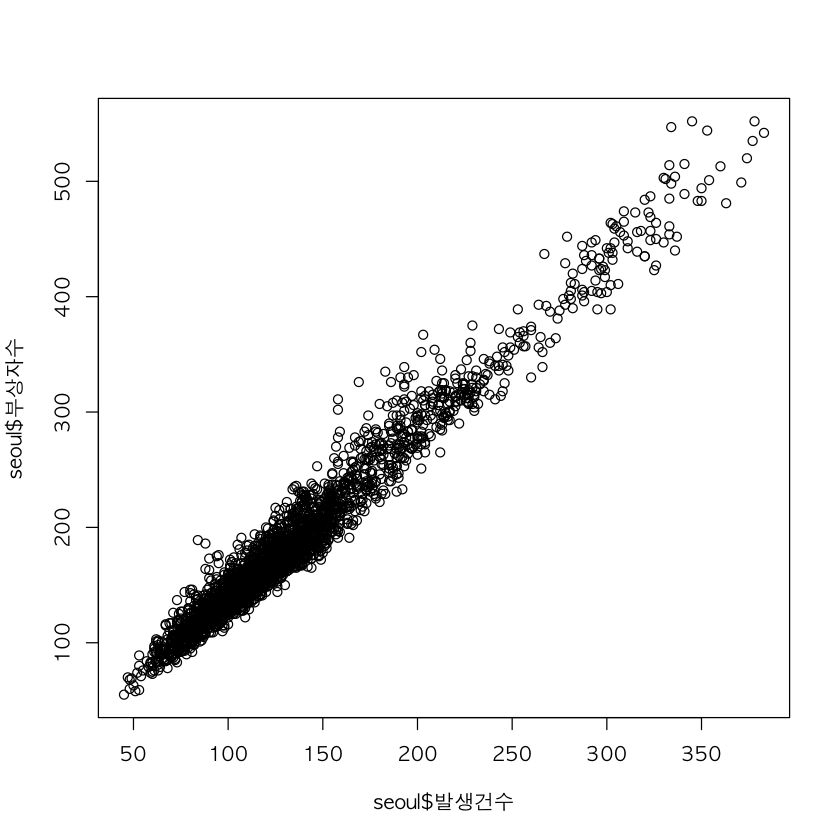

In [94]:
par(bg = 'white') # 배경 흰색
par(family = "AppleGothic")
#발생건수와 부상자의 산포도(산점도, 스캐터)그리기
plot(
    seoul$`발생건수`,
    seoul$`부상자수`)

In [93]:
### 서울시 교통사고 사망자수에 대한 변동계수 구하기
# 평균
regionDeath.mean <- aggregate(사망자수 ~ 자치구명, seoul, mean)

# 표준편차
regionDeath.sd <- aggregate(사망자수 ~ 자치구명, seoul, sd)

# 변동계수
regionDeath.cv <- regionDeath.sd$`사망자수` / regionDeath.mean$`사망자수`
# regionInjure.cv<- regionInjure.sd$[,2] / regionInjure.mean$[,2]
regionDeath.cv

# 데이터프레임 만들기
regionDeath<- data.frame(
    자치구명 = regionDeath.sd$자치구명,
    변동계수 = regionDeath.cv
)
regionInjure

# 정렬
arrange(regionDeath, 변동계수)

[1] 0.7864080 0.7663838 0.9826626 0.8635127 0.9202590 1.0026785 0.9565578
 [8] 1.1968557 0.8443981 1.1260506 0.9432929 1.0596641 1.0556714 0.9634543
[15] 0.8277334 1.0422291 0.9886017 0.8062102 1.0473578 0.6293361 0.9609775
[22] 0.8527234 0.9332813 1.3235261 1.1019842

자치구명,변동계수
<chr>,<dbl>
강남구,0.1125485
강동구,0.1427554
강북구,0.1356240
강서구,0.1565859
관악구,0.1903978
광진구,0.2353976
구로구,0.1408256
금천구,0.2206970
노원구,0.1283799


자치구명,변동계수
<chr>,<dbl>
영등포구,0.6293361
강동구,0.7663838
강남구,0.7864080
송파구,0.8062102
서초구,0.8277334
노원구,0.8443981
은평구,0.8527234
강서구,0.8635127
관악구,0.9202590
